# ***Analisis de exploracion de datos RMCAB para calidad del aire en Bogotá***

## *1. Importar bibliotecas y bases de datos*

In [59]:
#Librerias
import pandas as pd
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [60]:
#Importar archivo consolidado
#Ruta Drive Ronadl /content/drive/MyDrive/Semestre 4/RNA/Proyecto RNA/Entrega 1 Descriptivo/Insumos/DataFramePandas.csv
path = '/Users/macronald/U Central/Tesis Maestria Calidad/Insumos/df_consolidado.csv'
df = pd.read_csv(path)
df

,DateTime,Estacion,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),SO2(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Presion Baro(mmHg),Rad Solar(W/M²),Precipitacion(mm)
0,2020-01-01 01:00:00,Usaquen,17.0,17.0,NaN,NaN,NaN,NaN,0.7,NaN,1.1,238.0,13.0,NaN,NaN,0.0
1,2020-01-01 01:00:00,PuenteAranda,19.0,8.7,0.6,6.6,7.2,0.5,0.3,7.9,0.8,272.0,11.3,NaN,NaN,0.0
2,2020-01-01 01:00:00,LasFerias,NaN,35.0,4.8,15.9,20.7,NaN,0.5,6.1,0.8,188.0,11.5,564.0,NaN,0.0
3,2020-01-01 01:00:00,CarvajalSevillana,NaN,35.0,NaN,NaN,NaN,0.4,0.4,11.3,0.3,278.0,13.1,NaN,NaN,0.0
4,2020-01-01 01:00:00,Fontibon,30.7,23.0,1.3,9.3,10.6,3.3,0.2,12.7,NaN,232.0,12.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635731,2024-02-06 22:00:00,Bolivia,22.7,12.8,NaN,NaN,NaN,2.2,1.7,1.3,NaN,NaN,NaN,NaN,NaN,0.0
635732,2024-02-06 23:00:00,Bolivia,31.9,15.8,NaN,NaN,NaN,2.3,1.2,1.3,NaN,NaN,NaN,NaN,NaN,0.0
635733,2024-02-06 23:00:00,CarvajalSevillana,52.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,NaN,NaN,0.0
635734,2024-02-06 23:59:00,Bolivia,33.3,15.8,NaN,NaN,NaN,2.4,0.8,1.3,NaN,NaN,NaN,NaN,NaN,0.1


In [61]:
print('El DataFrame está compuesto por {:,}'.format(df.shape[0]),'filas y',df.shape[1],'columnas')
print('Con información distribuida en las siguientes variables:', df.columns)
print('Las variables almacenan la información en el siguiente formato:', df.dtypes)

El DataFrame está compuesto por 635,736 filas y 16 columnas
Con información distribuida en las siguientes variables: Index(['DateTime', 'Estacion', 'PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO(ppb)',
       'NO2(ppb)', 'NOX(ppb)', 'SO2(ppb)', 'CO(ppm)', 'OZONO(ppb)',
       'Vel Viento(m/s)', 'Dir Viento(Grados)', 'Temperatura(°C)',
       'Presion Baro(mmHg)', 'Rad Solar(W/M²)', 'Precipitacion(mm)'],
      dtype='object')
Las variables almacenan la información en el siguiente formato: DateTime               object
Estacion               object
PM10(µg/m3)           float64
PM2.5(µg/m3)          float64
NO(ppb)               float64
NO2(ppb)              float64
NOX(ppb)              float64
SO2(ppb)              float64
CO(ppm)               float64
OZONO(ppb)            float64
Vel Viento(m/s)       float64
Dir Viento(Grados)    float64
Temperatura(°C)       float64
Presion Baro(mmHg)    float64
Rad Solar(W/M²)       float64
Precipitacion(mm)     float64
dtype: object


## *2. Entedimiento del Dataset*

### **Identificacion de variables**

1. **DateTime:** Representa la fecha y hora de los datos registrados.
2. **Estacion:** Se refiere a la estación o ubicación donde se recopilan los datos.
3. **PM10(µg/m³):** Concentración de Material Particulado de 10 micrómetros o menos en diámetro en microgramos por metro cúbico.
4. **PM2.5(µg/m³):** Concentración de Material Particulado de 2.5 micrómetros o menos en diámetro en microgramos por metro cúbico.
5. **NO(ppb):** Concentración de Óxido Nítrico en partes por mil millones.
6. **NO2(ppb):** Concentración de Dióxido de Nitrógeno en partes por mil millones.
7. **NOX(ppb):** Concentración de Óxidos de Nitrógeno en partes por mil millones.
8. **SO2(ppb):** Concentración de Dióxido de Azufre en partes por mil millones.
9. **CO(ppm):** Concentración de Monóxido de Carbono en partes por millón.
10. **OZONO(ppb):** Concentración de Ozono en partes por mil millones.
11. **Vel Viento(m/s):** Velocidad del viento en metros por segundo.
12. **Dir Viento(Grados):** Dirección del viento en grados.
13. **Temperatura(°C):** Temperatura en grados Celsius.
14. **Presion Baro(mmHg):** Presión barométrica en milímetros de mercurio.
15. **Rad Solar(W/M²):** Radiación solar en vatios por metro cuadrado.
16. **Precipitacion(mm):** Precipitación en milímetros.
17. **CO2(ppm):** Concentración de Dióxido de Carbono en partes por millón.
18. **HR(%):** Porcentaje de Humedad Relativa.

Dentro del entorno de las variables se identifican las siguientes variables y se procede a determinar el tipo de variable ya que el dataframe nos devuelve todas las columnas como tipo object

In [62]:
#Identificar tipos de variables
df.dtypes

DateTime               object
Estacion               object
PM10(µg/m3)           float64
PM2.5(µg/m3)          float64
NO(ppb)               float64
NO2(ppb)              float64
NOX(ppb)              float64
SO2(ppb)              float64
CO(ppm)               float64
OZONO(ppb)            float64
Vel Viento(m/s)       float64
Dir Viento(Grados)    float64
Temperatura(°C)       float64
Presion Baro(mmHg)    float64
Rad Solar(W/M²)       float64
Precipitacion(mm)     float64
dtype: object

### Tipo de Datos

* **Variables Numéricas Continuas:**
PM10(µg/m³)
PM2.5(µg/m³)
NO(ppb)
NO2(ppb)
NOX(ppb)
SO2(ppb)
CO(ppm)
OZONO(ppb)
Vel Viento(m/s)
Temperatura(°C)
Presion Baro(mmHg)
Rad Solar(W/M²)
Precipitacion(mm)
CO2(ppm)
HR(%)

* **Variable Categórica:** Estacion, representa diferentes estaciones de monitoreo

Fecha y Hora (DateTime): Esta variable podría ser tratada como una variable temporal o convertirse en componentes separados como fecha y hora, dependiendo de las necesidades de análisis.

Es importante señalar que las variables SO2(ppb) y CO(ppm) contienen valores faltantes (representados por "NaN" y "----"), y estos deben manejarse adecuadamente durante el análisis de datos para evitar sesgos o interpretaciones incorrectas.

In [63]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')

Temporalidad de los datos de 2015 a 2023 Agosto

In [64]:
print(df.dtypes)

DateTime              datetime64[ns]
Estacion                      object
PM10(µg/m3)                  float64
PM2.5(µg/m3)                 float64
NO(ppb)                      float64
NO2(ppb)                     float64
NOX(ppb)                     float64
SO2(ppb)                     float64
CO(ppm)                      float64
OZONO(ppb)                   float64
Vel Viento(m/s)              float64
Dir Viento(Grados)           float64
Temperatura(°C)              float64
Presion Baro(mmHg)           float64
Rad Solar(W/M²)              float64
Precipitacion(mm)            float64
dtype: object


In [65]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent*100], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Presion Baro(mmHg),316146,49.729133
Rad Solar(W/M²),308532,48.531466
SO2(ppb),256620,40.365812
Vel Viento(m/s),142936,22.483547
Precipitacion(mm),139090,21.878579
OZONO(ppb),135466,21.308531
NO2(ppb),120321,18.926252
NO(ppb),120319,18.925938
NOX(ppb),120306,18.923893
CO(ppm),119254,18.758415


Filtro por datos a partir de 2021

# **Agregamos consulta del ICA antes de inputar los datos**

In [66]:
import pandas as pd
import numpy as np

def calcular_ICA(contaminante, valor):
    Categorias = {
        'PM10(µg/m3)': {
            (0, 54): ('Buena', 50, 0),
            (55, 154): ('Moderada', 100, 51),
            (155, 254): ('Afecta Grupos Sensibles', 150, 101),
            (255, 354): ('Dañina', 200, 151),
            (355, 424): ('Muy Dañina', 300, 201),
            (425, 604): ('Peligroso', 500, 301),
        },
        'PM2.5(µg/m3)': {
            (0, 15.4): ('Buena', 50, 0),
            (15.5, 40.4): ('Moderada', 100, 51),
            (40.5, 65.4): ('Afecta Grupos Sensibles', 150, 101),
            (65.5, 150.4): ('Dañina', 200, 151),
            (150.5, 250.4): ('Muy Dañina', 300, 201),
            (250.5, 500.4): ('Peligroso', 500, 301),
        },
        'CO(ppm)': {
            (0, 4.4): ('Buena', 50, 0),
            (4.5, 9.4): ('Moderada', 100, 51),
            (9.5, 12.4): ('Afecta Grupos Sensibles', 150, 101),
            (12.5, 15.4): ('Dañina', 200, 151),
            (15.5, 30.4): ('Muy Dañina', 300, 201),
            (30.5, 50.4): ('Peligroso', 500, 301),
        },
        'OZONO(ppb)': {
            (0, 124): ('Buena', 100, 0),
            (125, 164): ('Afecta Grupos Sensibles', 150, 101),
            (165, 204): ('Dañina', 200, 151),
            (205, 404): ('Muy Dañina', 300, 201),
            (405, 604): ('Peligroso', 500, 301),
        },
        'NO2(ppb)': {
            (0, 650): ('Buena', 200, 0),
            (651, 1240): ('Muy Dañina', 300, 201),
            (1241, 2040): ('Peligroso', 500, 301),
        },
    }

    if pd.isnull(valor):
        CategoriaIca = 'Atipico'
        ICA = -100
    else:
        ICA = 0
        CategoriaIca = 'Atipico'
        rangos = Categorias.get(contaminante, {})
        for (CInf, CSup), (CategoriaIca, IcaSup, IcaInf) in rangos.items():
            if CInf <= valor <= CSup:
                ICA = ((IcaSup - IcaInf) / (CSup - CInf)) * (valor - CInf) + IcaInf
                break

    return ICA

# Lista de contaminantes
contaminantes = ['PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO2(ppb)', 'OZONO(ppb)','CO(ppm)']

# Calcular el ICA para cada contaminante y cada registro
df['ICA'] = df.apply(lambda row: max([calcular_ICA(contaminante, row[contaminante]) for contaminante in contaminantes]), axis=1)

# Redondear el valor de los decimales en la columna 'ICA' a 2 decimales
df['ICA'] = df['ICA'].round(0)

# Mostrar el DataFrame resultante
print(df[['ICA']])
df.head(100)



          ICA
0        54.0
1        28.0
2        89.0
3        89.0
4        66.0
...       ...
635731   42.0
635732   52.0
635733   91.0
635734   52.0
635735  116.0

[635736 rows x 1 columns]


,DateTime,Estacion,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),SO2(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Presion Baro(mmHg),Rad Solar(W/M²),Precipitacion(mm),ICA
0,2020-01-01 01:00:00,Usaquen,17.0,17.0,NaN,NaN,NaN,NaN,0.7,NaN,1.1,238.0,13.0,NaN,NaN,0.0,54.0
1,2020-01-01 01:00:00,PuenteAranda,19.0,8.7,0.6,6.6,7.2,0.5,0.3,7.9,0.8,272.0,11.3,NaN,NaN,0.0,28.0
2,2020-01-01 01:00:00,LasFerias,NaN,35.0,4.8,15.9,20.7,NaN,0.5,6.1,0.8,188.0,11.5,564.0,NaN,0.0,89.0
3,2020-01-01 01:00:00,CarvajalSevillana,NaN,35.0,NaN,NaN,NaN,0.4,0.4,11.3,0.3,278.0,13.1,NaN,NaN,0.0,89.0
4,2020-01-01 01:00:00,Fontibon,30.7,23.0,1.3,9.3,10.6,3.3,0.2,12.7,NaN,232.0,12.6,NaN,NaN,NaN,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-01-01 08:00:00,Guaymaral,27.0,27.0,15.0,7.6,22.6,NaN,NaN,5.8,0.7,357.0,11.6,564.0,206.0,0.0,74.0
96,2020-01-01 08:00:00,Fontibon,83.0,72.5,28.9,18.2,47.2,4.8,0.7,5.9,NaN,39.0,13.1,NaN,NaN,NaN,155.0
97,2020-01-01 08:00:00,SanCristobal,25.0,11.0,NaN,NaN,NaN,NaN,NaN,9.2,1.5,94.0,12.0,NaN,325.0,0.0,36.0
98,2020-01-01 08:00:00,AltoRendimiento,NaN,42.0,27.5,14.7,42.2,1.2,1.4,8.0,0.4,57.0,13.7,NaN,231.0,0.0,104.0


***Realizamos calculo del IBOCA***

Validar la data primero inputandola para no perder las estampas de tiempo

In [67]:
df_Filtrado  = df
df_Filtrado.shape

(635736, 17)

In [68]:
# Filtrar los datos con valores atípicos en la columna 'ICA'
datos_atipicos = df[(df['ICA'] == -100) | (df['ICA'] == 0)]

# Convertir la columna 'DateTime' a tipo datetime si aún no lo es
datos_atipicos['DateTime'] = pd.to_datetime(datos_atipicos['DateTime'])

# Extraer el mes y el año de la columna 'DateTime'
datos_atipicos['Mes'] = datos_atipicos['DateTime'].dt.month
datos_atipicos['Año'] = datos_atipicos['DateTime'].dt.year

# Crear una tabla pivote por estación, columna y mes
tabla_pivote = pd.pivot_table(datos_atipicos, 
                               index=['Estacion'], 
                               columns=['Año', 'Mes'], 
                               values='ICA', 
                               aggfunc='mean')

# Si deseas llenar los valores NaN con otro valor, por ejemplo, 0, puedes hacerlo así:
# tabla_pivote = tabla_pivote.fillna(0)

# Si deseas reorganizar el índice para que los niveles estén en el orden deseado, puedes hacerlo así:
# tabla_pivote = tabla_pivote.reorder_levels(['Estacion', 'Columna1'], axis=0)

# Si deseas ordenar las columnas de la tabla pivote de alguna manera específica, puedes hacerlo así:
# tabla_pivote = tabla_pivote.sort_index(axis=1)

# Si deseas resetear el índice para convertirlos en columnas nuevamente, puedes hacerlo así:
# tabla_pivote = tabla_pivote.reset_index()

# Imprimir la tabla pivote
tabla_pivote



Año                 2020                                                 \
Mes                   1      2      3           4      5      6      7    
Estacion                                                                  
AltoRendimiento      NaN    NaN -100.0 -100.000000    NaN -100.0    NaN   
Bolivia              NaN    NaN    NaN         NaN    NaN    NaN    NaN   
CarvajalSevillana    NaN    NaN -100.0 -100.000000    NaN -100.0    NaN   
CiudadBolivar        NaN    NaN    NaN         NaN    NaN    NaN    NaN   
Colina               NaN    NaN    NaN         NaN    NaN    NaN    NaN   
Fontibon             0.0    NaN -100.0 -100.000000    NaN    NaN -100.0   
Guaymaral         -100.0    NaN -100.0 -100.000000    NaN    NaN -100.0   
Jazmin               NaN    NaN    NaN         NaN    NaN    NaN    NaN   
Kennedy              NaN    NaN    NaN         NaN    NaN    NaN    NaN   
LasFerias            NaN -100.0    NaN -100.000000    NaN    NaN    NaN   
MinAmbiente          NaN    NaN  -50.0 -100.000000    NaN    NaN    NaN   
MovilFontibon        NaN    NaN    NaN         NaN    NaN    NaN    NaN   
MovilSeptima         NaN -100.0 -100.0  -66.666667 -100.0 -100.0 -100.0   
PuenteAranda      -100.0    NaN -100.0 -100.000000    NaN    NaN    NaN   
SanCristobal      -100.0    NaN -100.0         NaN    NaN    NaN    NaN   
Suba              -100.0 -100.0    NaN         NaN    NaN    NaN    NaN   
Tunal                0.0    NaN    NaN         NaN    NaN    NaN -100.0   
Usaquen              NaN    NaN    NaN         NaN    NaN -100.0 -100.0   
Usme                 NaN    NaN    NaN         NaN    NaN    NaN    NaN   

Año                                          ...   2023                       \
Mes                        8      9      10  ...     5      6      7      8    
Estacion                                     ...                               
AltoRendimiento   -100.000000 -100.0    NaN  ...    NaN -100.0 -100.0    NaN   
Bolivia                   NaN    NaN -100.0  ... -100.0 -100.0 -100.0 -100.0   
CarvajalSevillana -100.000000    NaN    NaN  ... -100.0 -100.0 -100.0    NaN   
CiudadBolivar             NaN    NaN    NaN  ... -100.0 -100.0 -100.0 -100.0   
Colina                    NaN    NaN    NaN  ... -100.0 -100.0 -100.0 -100.0   
Fontibon          -100.000000    NaN    NaN  ...    NaN -100.0 -100.0    NaN   
Guaymaral                 NaN -100.0 -100.0  ...    NaN -100.0 -100.0 -100.0   
Jazmin                    NaN    NaN    NaN  ... -100.0 -100.0 -100.0 -100.0   
Kennedy                   NaN    NaN    NaN  ... -100.0 -100.0 -100.0    NaN   
LasFerias                 NaN    NaN    NaN  ...    NaN -100.0 -100.0    NaN   
MinAmbiente               NaN    NaN    NaN  ... -100.0 -100.0    NaN    NaN   
MovilFontibon             NaN    NaN    NaN  ... -100.0 -100.0 -100.0 -100.0   
MovilSeptima      -100.000000    NaN -100.0  ... -100.0 -100.0 -100.0 -100.0   
PuenteAranda      -100.000000    NaN    NaN  ...    NaN -100.0    NaN -100.0   
SanCristobal      -100.000000    NaN    NaN  ...    NaN    NaN -100.0    NaN   
Suba              -100.000000    NaN    NaN  ...    NaN    NaN    NaN    NaN   
Tunal             -100.000000    NaN    NaN  ... -100.0 -100.0    NaN -100.0   
Usaquen            -66.666667    NaN    NaN  ...    NaN -100.0 -100.0    NaN   
Usme                      NaN    NaN    NaN  ... -100.0 -100.0    NaN -100.0   

Año                                                  2024         
Mes                        9      10     11     12     1      2   
Estacion                                                          
AltoRendimiento   -100.000000 -100.0 -100.0 -100.0 -100.0 -100.0  
Bolivia           -100.000000 -100.0    NaN -100.0 -100.0    NaN  
CarvajalSevillana -100.000000 -100.0 -100.0 -100.0 -100.0    NaN  
CiudadBolivar             NaN -100.0 -100.0 -100.0 -100.0    NaN  
Colina            -100.000000 -100.0 -100.0 -100.0 -100.0    NaN  
Fontibon          -100.000000 -100.0 -100.0    NaN  

In [69]:
# Crear una tabla pivote por estación, columna y mes, contando la cantidad de valores NaN o -100
tabla_pivote_conteo = pd.pivot_table(datos_atipicos, 
                                     index='Estacion', 
                                     columns=['Año'], 
                                     values='ICA', 
                                     aggfunc=lambda x: sum(x.isna() | (x == -100)))

# Imprimir la tabla pivote con conteo de NaN y -100
tabla_pivote_conteo


Año,2020,2021,2022,2023,2024
Estacion,,,,,
AltoRendimiento,10.0,31.0,4.0,28.0,129.0
Bolivia,126.0,30.0,71.0,1554.0,2.0
CarvajalSevillana,15.0,159.0,4944.0,5224.0,1.0
CiudadBolivar,16.0,103.0,104.0,27.0,2.0
Colina,NaN,974.0,132.0,147.0,1.0
Fontibon,7.0,427.0,7.0,11.0,NaN
Guaymaral,54.0,110.0,67.0,163.0,2.0
Jazmin,1.0,52.0,195.0,90.0,3.0
Kennedy,NaN,231.0,896.0,97.0,2.0


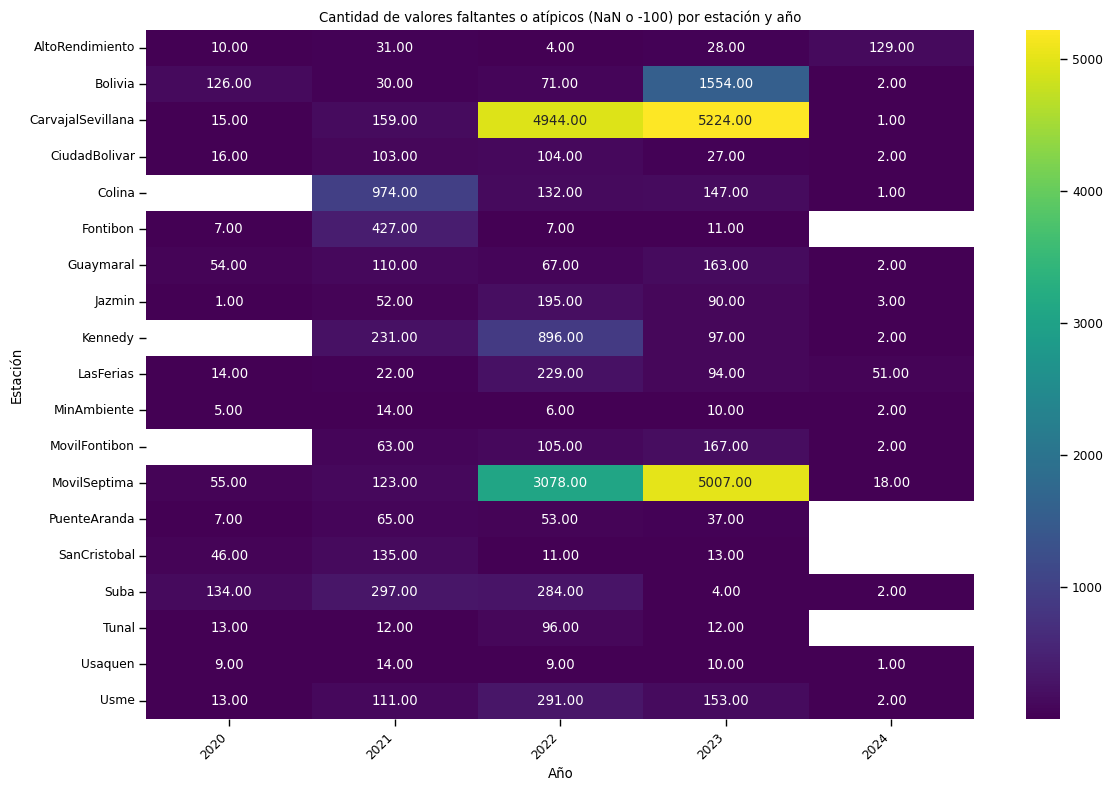

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el mapa de calor con formato adecuado para valores de punto flotante
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_pivote_conteo, cmap='viridis', annot=True, fmt='.2f')
plt.title('Cantidad de valores faltantes o atípicos (NaN o -100) por estación y año')
plt.xlabel('Año')
plt.ylabel('Estación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



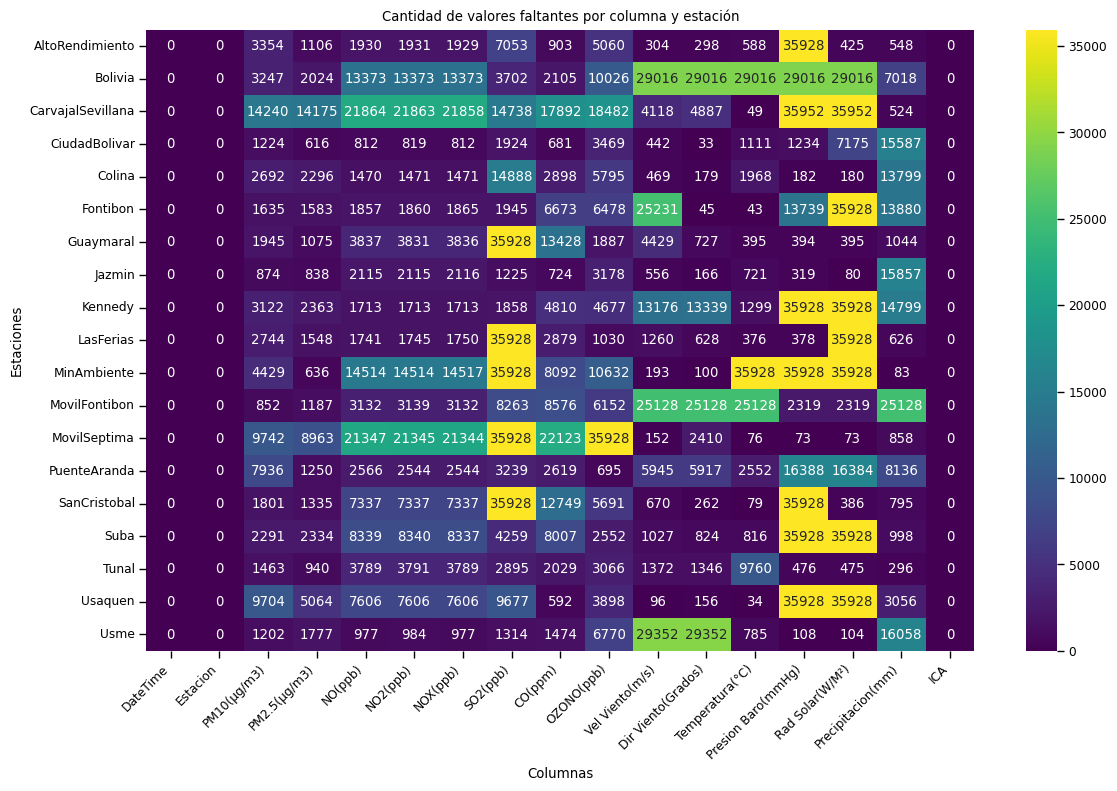

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la cantidad de valores faltantes por columna para cada estación
faltantes_por_estacion = df.groupby('Estacion').apply(lambda x: x.isna().sum())

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(faltantes_por_estacion, cmap='viridis', annot=True, fmt='d')
plt.title('Cantidad de valores faltantes por columna y estación')
plt.xlabel('Columnas')
plt.ylabel('Estaciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [72]:
df_Filtrado.dtypes

DateTime              datetime64[ns]
Estacion                      object
PM10(µg/m3)                  float64
PM2.5(µg/m3)                 float64
NO(ppb)                      float64
NO2(ppb)                     float64
NOX(ppb)                     float64
SO2(ppb)                     float64
CO(ppm)                      float64
OZONO(ppb)                   float64
Vel Viento(m/s)              float64
Dir Viento(Grados)           float64
Temperatura(°C)              float64
Presion Baro(mmHg)           float64
Rad Solar(W/M²)              float64
Precipitacion(mm)            float64
ICA                          float64
dtype: object

In [73]:
#Add new column zonas
ZonaNorOcc=['Bolivia', 'Colina','Fontibon ', 'MovilFontibon','Suba']
ZonaCentrOri=['Guaymaral ','CentroAltoRendimiento','Las Ferias','Movil7ma','Usaquen']
ZonaSurOriente=['MinAmbiente','PuenteAranda','SanCristobal','Tunal','Usme','Jazmin']
ZonaSurOcc=['CarvajalSevillana','Kennedy','CiudadBolivar']

In [74]:
df_Filtrado = df_Filtrado.reset_index()
df_Filtrado

,index,DateTime,Estacion,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),SO2(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Presion Baro(mmHg),Rad Solar(W/M²),Precipitacion(mm),ICA
0,0,2020-01-01 01:00:00,Usaquen,17.0,17.0,NaN,NaN,NaN,NaN,0.7,NaN,1.1,238.0,13.0,NaN,NaN,0.0,54.0
1,1,2020-01-01 01:00:00,PuenteAranda,19.0,8.7,0.6,6.6,7.2,0.5,0.3,7.9,0.8,272.0,11.3,NaN,NaN,0.0,28.0
2,2,2020-01-01 01:00:00,LasFerias,NaN,35.0,4.8,15.9,20.7,NaN,0.5,6.1,0.8,188.0,11.5,564.0,NaN,0.0,89.0
3,3,2020-01-01 01:00:00,CarvajalSevillana,NaN,35.0,NaN,NaN,NaN,0.4,0.4,11.3,0.3,278.0,13.1,NaN,NaN,0.0,89.0
4,4,2020-01-01 01:00:00,Fontibon,30.7,23.0,1.3,9.3,10.6,3.3,0.2,12.7,NaN,232.0,12.6,NaN,NaN,NaN,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635731,635731,2024-02-06 22:00:00,Bolivia,22.7,12.8,NaN,NaN,NaN,2.2,1.7,1.3,NaN,NaN,NaN,NaN,NaN,0.0,42.0
635732,635732,2024-02-06 23:00:00,Bolivia,31.9,15.8,NaN,NaN,NaN,2.3,1.2,1.3,NaN,NaN,NaN,NaN,NaN,0.0,52.0
635733,635733,2024-02-06 23:00:00,CarvajalSevillana,52.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,NaN,NaN,0.0,91.0
635734,635734,2024-02-06 23:59:00,Bolivia,33.3,15.8,NaN,NaN,NaN,2.4,0.8,1.3,NaN,NaN,NaN,NaN,NaN,0.1,52.0


Validacion

In [75]:
for i in range(len(df_Filtrado)):
  estacion = df_Filtrado.loc[i,'Estacion']

  if estacion in ZonaNorOcc:
        df_Filtrado.loc[i,'Zonas']='Noroccidente'
  elif estacion in ZonaCentrOri:
        df_Filtrado.loc[i,'Zonas']='Centro Oriente'
  elif estacion in ZonaSurOriente:
        df_Filtrado.loc[i,'Zonas']='Suroriente'
  elif estacion in ZonaSurOcc:
        df_Filtrado.loc[i,'Zonas']='Suroccidente'
  else:
        df_Filtrado.loc[i,'Zonas']= None

## *Comprobacion de normalidad por variable*

In [76]:
df_Filtrado.describe().T

,count,mean,min,25%,50%,75%,max,std
index,635736.0,317867.5,0.0,158933.75,317867.5,476801.25,635735.0,183521.319704
DateTime,635736,2022-03-02 07:30:25.360621568,2020-01-01 01:00:00,2021-03-27 12:00:00,2022-03-11 01:00:00,2023-02-22 14:00:00,2024-02-06 23:59:00,NaN
PM10(µg/m3),561239.0,32.865322,0.0,16.4,27.5,43.3,326.2,23.071741
PM2.5(µg/m3),584626.0,16.141689,0.0,7.0,13.1,22.4,188.0,12.262542
NO(ppb),515417.0,18.352349,0.0,3.2,8.0,22.2,367.1,25.909181
NO2(ppb),515415.0,15.619286,-0.7,8.1,14.4,21.4,138.2,9.485202
NOX(ppb),515430.0,33.963223,0.0,13.2,24.6,44.2,395.3,30.581015
SO2(ppb),379116.0,1.860382,-0.1,0.7,1.2,2.1,197.0,2.540476
CO(ppm),516482.0,0.643896,-0.3,0.3,0.5,0.8,12.0,0.499906
OZONO(ppb),500270.0,12.31749,-11.2,3.4,9.8,18.4,106.3,10.884934


In [77]:
## Atipicos ICA

df_atipicos = df_Filtrado[(df_Filtrado['ICA'] == -100) | (df_Filtrado['ICA'] == 0)]
df_atipicos

,index,DateTime,Estacion,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),SO2(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Presion Baro(mmHg),Rad Solar(W/M²),Precipitacion(mm),ICA,Zonas
809,809,2020-01-03 15:00:00,Guaymaral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,251.0,24.7,563.0,820.0,0.0,-100.0,None
2042,2042,2020-01-07 14:00:00,SanCristobal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,Suroriente
2061,2061,2020-01-07 15:00:00,SanCristobal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,Suroriente
2076,2076,2020-01-07 16:00:00,SanCristobal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,Suroriente
2083,2083,2020-01-07 17:00:00,SanCristobal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,Suroriente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635594,635594,2024-02-05 20:00:00,AltoRendimiento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,None
635628,635628,2024-02-05 21:00:00,AltoRendimiento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,None
635644,635644,2024-02-05 22:00:00,AltoRendimiento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,None
635651,635651,2024-02-05 23:00:00,AltoRendimiento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,None


In [78]:
# Agrupar por la columna 'Estacion'
grupos_por_estacion = df_atipicos.groupby('Estacion')

# Iterar sobre cada grupo y realizar el análisis deseado
for estacion, datos_estacion in grupos_por_estacion:
    print("-------------------------------------------------------")
    print(f"Análisis para la estación: {estacion}")
    # Aquí puedes realizar cualquier análisis específico para cada estación
    # Por ejemplo, puedes calcular estadísticas descriptivas, graficar los datos, etc.
    print(datos_estacion.describe()) # Ejemplo: Mostrar estadísticas descriptivas para cada estación
    print("-------------------------------------------------------")


-------------------------------------------------------
Análisis para la estación: AltoRendimiento
               index                       DateTime  PM10(µg/m3)  \
count     202.000000                            202          0.0   
mean   508346.945545  2023-04-30 03:52:32.079207680          NaN   
min     19783.000000            2020-03-04 10:00:00          NaN   
25%    467783.250000            2023-02-02 19:45:00          NaN   
50%    628224.500000            2024-01-20 15:30:00          NaN   
75%    634719.500000            2024-02-03 21:45:00          NaN   
max    635678.000000            2024-02-05 23:59:00          NaN   
std    203507.516675                            NaN          NaN   

       PM2.5(µg/m3)  NO(ppb)  NO2(ppb)  NOX(ppb)  SO2(ppb)  CO(ppm)  \
count           0.0      0.0       0.0       0.0       0.0      0.0   
mean            NaN      NaN       NaN       NaN       NaN      NaN   
min             NaN      NaN       NaN       NaN       NaN      NaN   
25% 

In [79]:
# Agrupar por la columna 'Estacion'
grupos_por_estacion = df_atipicos.groupby('Estacion')

# Iterar sobre cada grupo y realizar el análisis deseado
for estacion, datos_estacion in grupos_por_estacion:
    print(f"Análisis para la estación: {estacion}")
    # Calcular cantidad de valores faltantes por columna para cada estación
    faltantes_por_columna = datos_estacion.isna().sum()
    print("Cantidad de valores faltantes por columna:")
    print(faltantes_por_columna)
    
    # También puedes calcular la cantidad total de valores faltantes por estación
    total_faltantes = datos_estacion.isna().sum().sum()
    print(f"Total de valores faltantes para la estación {estacion}: {total_faltantes}")

    # Aquí puedes realizar cualquier otro análisis específico para cada estación
    # Por ejemplo, calcular estadísticas descriptivas, graficar los datos, etc.
    print(datos_estacion.describe())  # Ejemplo: Mostrar estadísticas descriptivas para cada estación


Análisis para la estación: AltoRendimiento
Cantidad de valores faltantes por columna:
index                   0
DateTime                0
Estacion                0
PM10(µg/m3)           202
PM2.5(µg/m3)          202
NO(ppb)               202
NO2(ppb)              202
NOX(ppb)              202
SO2(ppb)              202
CO(ppm)               202
OZONO(ppb)            202
Vel Viento(m/s)       157
Dir Viento(Grados)    157
Temperatura(°C)       157
Presion Baro(mmHg)    202
Rad Solar(W/M²)       157
Precipitacion(mm)     157
ICA                     0
Zonas                 202
dtype: int64
Total de valores faltantes para la estación AltoRendimiento: 2805
               index                       DateTime  PM10(µg/m3)  \
count     202.000000                            202          0.0   
mean   508346.945545  2023-04-30 03:52:32.079207680          NaN   
min     19783.000000            2020-03-04 10:00:00          NaN   
25%    467783.250000            2023-02-02 19:45:00          NaN   
5

               index                       DateTime  PM10(µg/m3)  \
count     397.000000                            397          0.0   
mean   366995.994962  2022-06-22 12:07:31.133500928          NaN   
min       809.000000            2020-01-03 15:00:00          NaN   
25%    251783.000000            2021-10-17 03:00:00          NaN   
50%    447314.000000            2022-12-19 22:00:00          NaN   
75%    528969.000000            2023-06-16 23:59:00          NaN   
max    624504.000000            2024-01-12 12:00:00          NaN   
std    168866.043372                            NaN          NaN   

       PM2.5(µg/m3)  NO(ppb)  NO2(ppb)  NOX(ppb)  SO2(ppb)  CO(ppm)  \
count           1.0      0.0       0.0       0.0       0.0      0.0   
mean            0.0      NaN       NaN       NaN       NaN      NaN   
min             0.0      NaN       NaN       NaN       NaN      NaN   
25%             0.0      NaN       NaN       NaN       NaN      NaN   
50%             0.0      NaN    

In [80]:
Variable='ICA'

Text(0.5, 1.0, 'Q-Qplot')

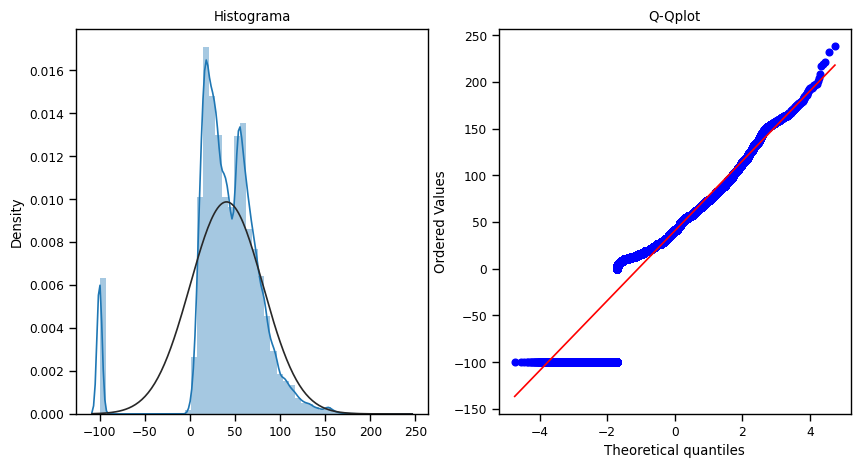

In [81]:
f, axes = plt.subplots(1,2,figsize=(10, 5))
sns.set_context("paper", font_scale=1)

sns.distplot(ax=axes[0], x=df_Filtrado[Variable], fit = norm)
axes[0].set_title("Histograma")

res = stats.probplot(x=df_Filtrado[Variable], plot = plt)
axes[1].set_title("Q-Qplot")

In [82]:
# Asimetría y curtosis:
print("Skewness: %f" % df_Filtrado[Variable].skew())
print("Kurtosis: %f" % df_Filtrado[Variable].kurt())

Skewness: -1.308899
Kurtosis: 4.330714


In [83]:
from scipy.stats import kstest, normaltest, anderson, shapiro

mu, sigma = 0, 0.1 # media y desviación típica
data = df_Filtrado[Variable].dropna()

print('******Kolmogorov*********************************************')
##Prueba KS
stat, p = kstest(data, 'norm')
print(p)
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad con KS')
    print("\t P_valor KS= {:.7f} \t stat = {:.5f}".format( p, stat))
else:
    print('Se acepta la normalidad con KS')
    print("\t P_valor KS= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba Shapiro
print('******Shapiro*********************************************')
stat, p = shapiro(data)
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad')
    print("\t P_valor SH= {:.7f} \t stat = {:.5f}".format( p, stat))
else:
    print('Se acepta la normalidad con SH')
    print("\t P_valor KS= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba  D’Agostino y Pearson’s
print('******D’Agostino******************************************')
stat, p = normaltest(data)
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad D’Agostino')
    print("\t P_valor DA= {:.7f} \t stat = {:.5f}".format( p, stat))
else:
    print('Se acepta la normalidad con DA')
    print("\t P_valor KS= {:.7f} \t stat = {:.5f}".format( p, stat))

******Kolmogorov*********************************************
0.0
Se rechaza la normalidad con KS
	 P_valor KS= 0.0000000 	 stat = 0.95455
******Shapiro*********************************************
Se rechaza la normalidad
	 P_valor SH= 0.0000000 	 stat = 0.85945
******D’Agostino******************************************
Se rechaza la normalidad D’Agostino
	 P_valor DA= 0.0000000 	 stat = 172511.77059


### Variable categórica

In [84]:
frecuencia_estacion = pd.value_counts(df['Estacion']).reset_index()
frecuencia_estacion.columns = ['Estacion', 'Frecuencia']
print(frecuencia_estacion)


             Estacion  Frecuencia
0   CarvajalSevillana       35952
1             Usaquen       35928
2        MovilSeptima       35928
3         MinAmbiente       35928
4     AltoRendimiento       35928
5               Tunal       35928
6        PuenteAranda       35928
7             Kennedy       35928
8        SanCristobal       35928
9                Suba       35928
10          Guaymaral       35928
11           Fontibon       35928
12          LasFerias       35928
13               Usme       29352
14             Jazmin       29352
15            Bolivia       29016
16      CiudadBolivar       28992
17             Colina       26808
18      MovilFontibon       25128


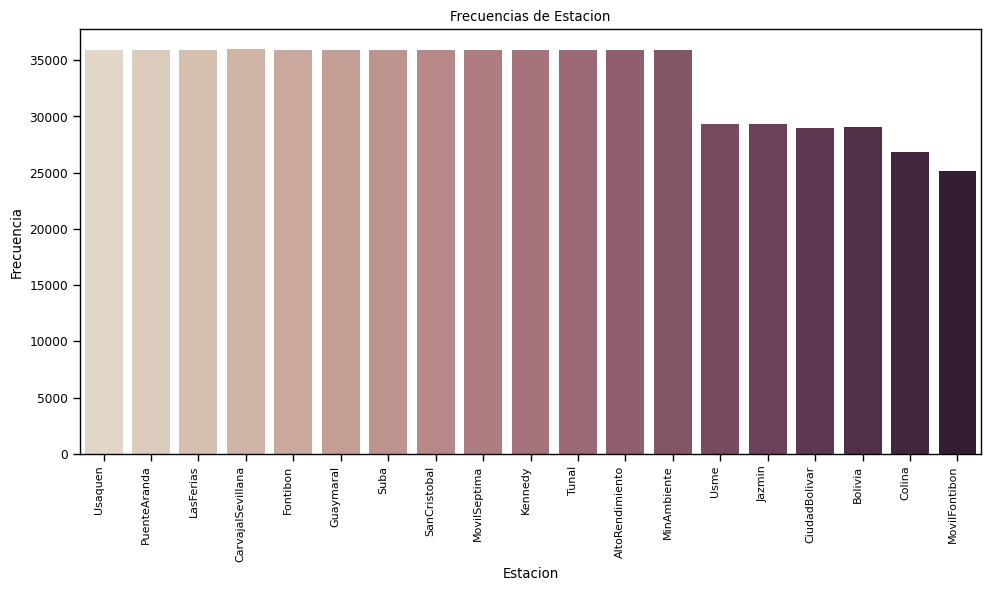

In [85]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="Estacion", palette="ch:.25")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=8)

plt.title('Frecuencias de Estacion')
plt.xlabel('Estacion')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## Relacion de Variables numericas

In [86]:
df_Filtrado = df_Filtrado.set_index('index')

In [87]:
columnas_continuas = df_Filtrado.select_dtypes(include='number').columns
columnas_continuas

Index(['PM10(µg/m3)', 'PM2.5(µg/m3)', 'NO(ppb)', 'NO2(ppb)', 'NOX(ppb)',
       'SO2(ppb)', 'CO(ppm)', 'OZONO(ppb)', 'Vel Viento(m/s)',
       'Dir Viento(Grados)', 'Temperatura(°C)', 'Presion Baro(mmHg)',
       'Rad Solar(W/M²)', 'Precipitacion(mm)', 'ICA'],
      dtype='object')

In [88]:
for i, variable in enumerate(columnas_continuas):
  print(i)
  print(variable)
  break

0
PM10(µg/m3)


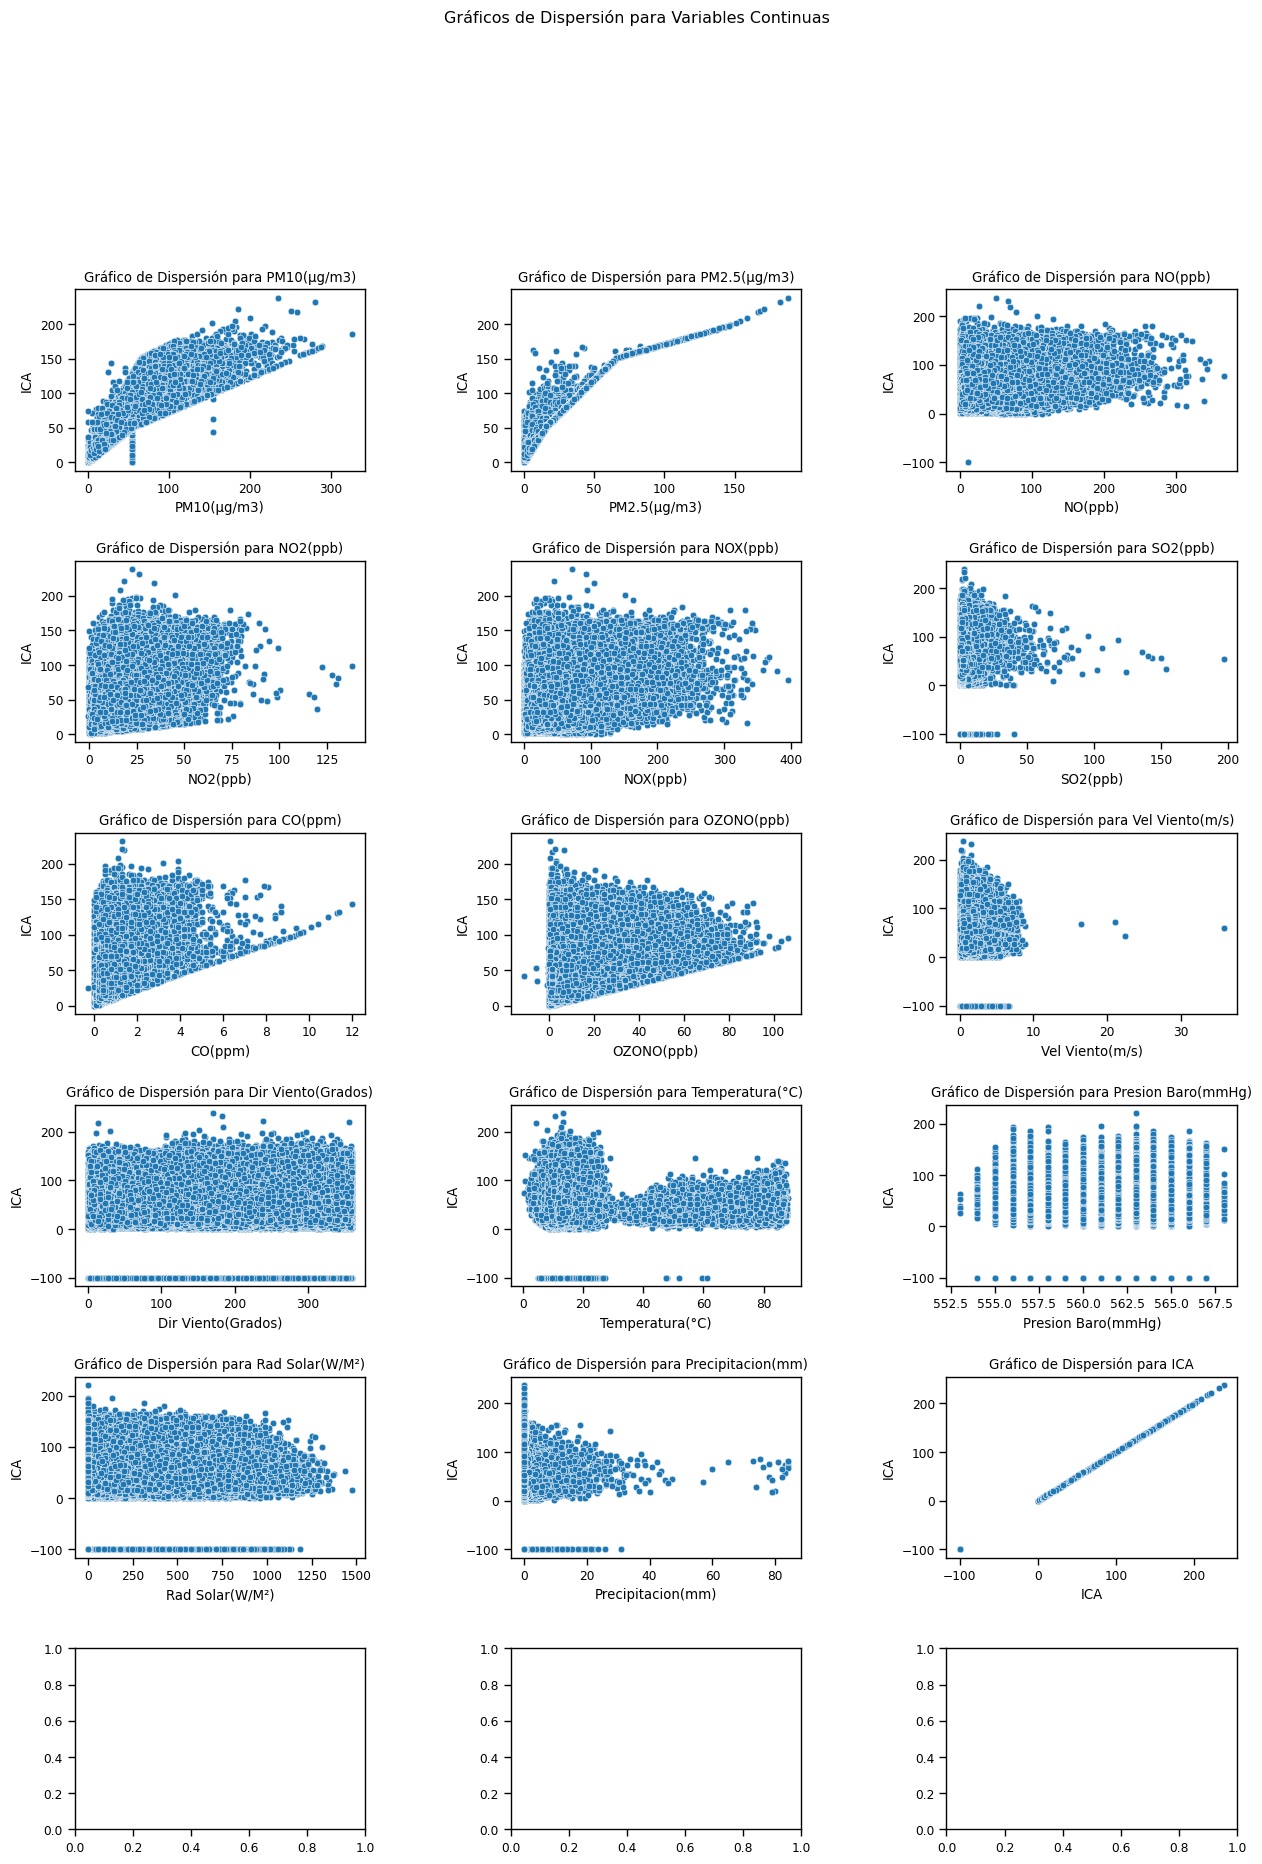

In [89]:
# Determinar el número de filas y columnas para los subgráficos
num_rows = 6  # Puedes ajustar según el número deseado de filas
num_cols = (len(columnas_continuas) + num_rows - 1) // num_rows

# Crear subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Ajustar el espaciado entre subgráficos
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Iterar a través de las columnas y agregar gráficos de dispersión en los subgráficos
for i, variable in enumerate(columnas_continuas):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=variable, y=Variable, data=df_Filtrado, ax=axes[row, col])
    axes[row, col].set_title(f'Gráfico de Dispersión para {variable}')

# Añadir título a la figura
fig.suptitle('Gráficos de Dispersión para Variables Continuas', y=1.02)

# Mostrar la figura
plt.show()







## Relacion con variables Categoricas

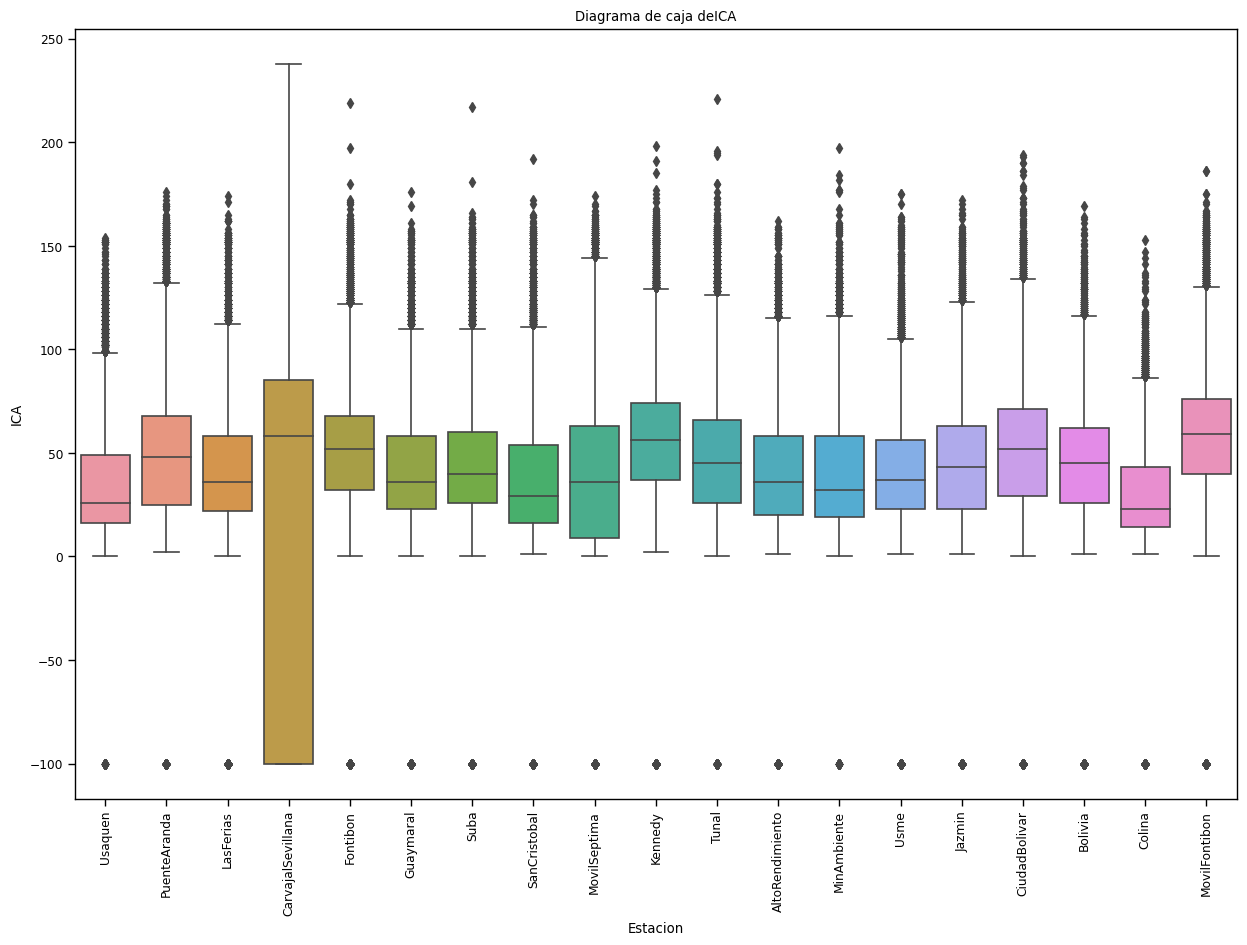

In [90]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=df_Filtrado[Variable],x=df_Filtrado['Estacion'])
plt.title('Diagrama de caja de'+Variable)
plt.ylabel(Variable)
# Rotar las etiquetas del eje x en 90 grados utilizando plt.xticks
plt.xticks(rotation=90)
plt.show()

***Relacion entre zonas***

In [91]:
#Filtros por Zona
filtroNorocidente = df_Filtrado['Zonas']=='Noroccidente'
filtroCentroOriente = df_Filtrado['Zonas']=='Centro Oriente'
filtroSurOriente = df_Filtrado['Zonas']=='Suroriente'
filtroSuroccidente = df_Filtrado['Zonas']=='Suroccidente'

In [92]:
#Dataframe con filtro Noroocidente
dfNoroccidente = df_Filtrado[filtroNorocidente]
dfCentroOriente = df_Filtrado[filtroCentroOriente]
dfSurOriente  = df_Filtrado[filtroSurOriente]
dfSuroccidente  = df_Filtrado[filtroSuroccidente]

(array([0, 1, 2]),
 [Text(0, 0, 'CarvajalSevillana'),
  Text(1, 0, 'Kennedy'),
  Text(2, 0, 'CiudadBolivar')])

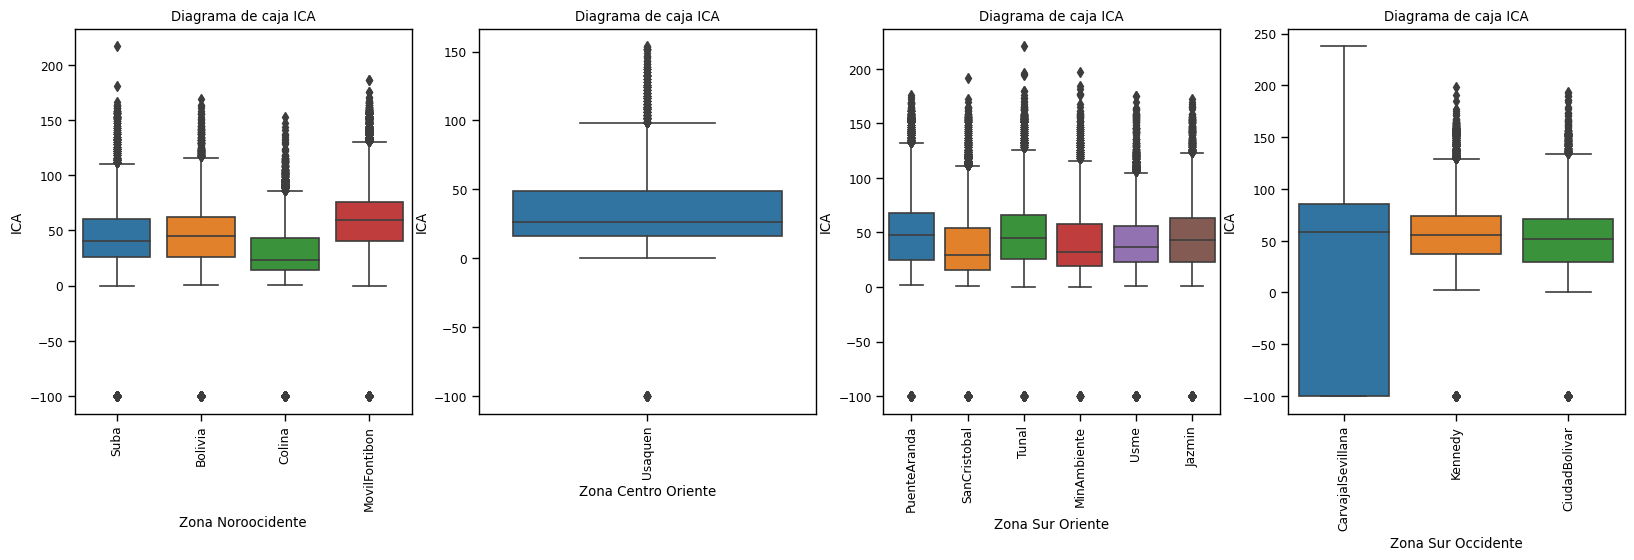

In [93]:
#Diagrama de Caja y Bigotes por Zonas PM10

plt.figure(figsize=(20,5)) # Tamaño de la figura

plt.subplot(1,4,1) # 1 fila 2 espacios, posicion1
sns.boxplot(y=dfNoroccidente[Variable],x=dfNoroccidente['Estacion'])
plt.title('Diagrama de caja '+Variable)
plt.xlabel('Zona Noroocidente') # Add x-axis label
plt.ylabel(Variable)
# Rotar las etiquetas del eje x en 90 grados utilizando plt.xticks
plt.xticks(rotation=90)

 # Tamaño de la figura
plt.subplot(1,4,2) # 1 fila 2 espacios, posicion1
sns.boxplot(y=dfCentroOriente[Variable],x=dfCentroOriente['Estacion'])
plt.title('Diagrama de caja '+Variable)
plt.xlabel('Zona Centro Oriente') # Add x-axis label
plt.ylabel(Variable)
# Rotar las etiquetas del eje x en 90 grados utilizando plt.xticks
plt.xticks(rotation=90)


plt.subplot(1,4,3) # 1 fila 2 espacios, posicion1
sns.boxplot(y=dfSurOriente[Variable],x=dfSurOriente ['Estacion'])
plt.title('Diagrama de caja '+Variable)
plt.xlabel('Zona Sur Oriente') # Add x-axis label
plt.ylabel(Variable)
# Rotar las etiquetas del eje x en 90 grados utilizando plt.xticks
plt.xticks(rotation=90)


plt.subplot(1,4,4) # 1 fila 2 espacios, posicion1
sns.boxplot(y=dfSuroccidente[Variable],x=dfSuroccidente['Estacion'])
plt.title('Diagrama de caja '+Variable)
plt.xlabel('Zona Sur Occidente') # Add x-axis label
plt.ylabel(Variable)
# Rotar las etiquetas del eje x en 90 grados utilizando plt.xticks
plt.xticks(rotation=90)

# ***Analisis de serie de Tiempo***

In [107]:
datos_mensuales

NameError: name 'datos_mensuales' is not defined

In [111]:
# Analisis de Serie de Tiempo
#df_Filtrado = df_Filtrado.set_index('DateTime')
#datos_mensuales = df_Filtrado.resample('W').mean()

# Graficar la serie de tiempo por meses
plt.figure(figsize=(15, 10))
plt.plot(df_Filtrado.index, df_Filtrado[Variable], label=Variable,color='orange')
plt.xlabel("Fecha")
plt.ylabel("Valor promedio "+ Variable)
plt.title("Serie de Tiempo "+Variable)
plt.legend()
plt.show()

TypeError: Could not convert UsaquenPuenteArandaLasFeriasCarvajalSevillanaFontibonGuaymaralSubaSanCristobalMovilSeptimaKennedyTunalAltoRendimientoMinAmbienteMovilSeptimaTunalMinAmbienteKennedyCarvajalSevillanaSanCristobalAltoRendimientoUsaquenPuenteArandaFontibonSubaLasFeriasGuaymaralKennedyPuenteArandaGuaymaralSanCristobalMinAmbienteMovilSeptimaTunalSubaFontibonUsaquenAltoRendimientoLasFeriasCarvajalSevillanaPuenteArandaTunalLasFeriasGuaymaralUsaquenSanCristobalMovilSeptimaCarvajalSevillanaMinAmbienteFontibonKennedySubaAltoRendimientoSanCristobalCarvajalSevillanaSubaMinAmbienteTunalPuenteArandaGuaymaralMovilSeptimaKennedyFontibonLasFeriasUsaquenAltoRendimientoUsaquenGuaymaralFontibonSubaLasFeriasMinAmbienteCarvajalSevillanaTunalKennedyMovilSeptimaAltoRendimientoPuenteArandaSanCristobalCarvajalSevillanaAltoRendimientoFontibonPuenteArandaLasFeriasKennedyGuaymaralMovilSeptimaUsaquenTunalSubaMinAmbienteSanCristobalMovilSeptimaMinAmbienteTunalUsaquenGuaymaralFontibonSanCristobalAltoRendimientoSubaCarvajalSevillanaLasFeriasKennedyPuenteArandaFontibonAltoRendimientoCarvajalSevillanaKennedyUsaquenMinAmbienteGuaymaralSanCristobalLasFeriasMovilSeptimaTunalSubaPuenteArandaCarvajalSevillanaKennedyTunalGuaymaralFontibonAltoRendimientoPuenteArandaUsaquenMovilSeptimaSubaSanCristobalMinAmbienteLasFeriasPuenteArandaLasFeriasTunalSubaKennedySanCristobalAltoRendimientoMovilSeptimaFontibonUsaquenCarvajalSevillanaGuaymaralMinAmbienteMovilSeptimaSanCristobalLasFeriasMinAmbienteCarvajalSevillanaSubaGuaymaralFontibonAltoRendimientoKennedyUsaquenPuenteArandaTunalAltoRendimientoLasFeriasSubaSanCristobalMinAmbienteGuaymaralFontibonKennedyCarvajalSevillanaMovilSeptimaPuenteArandaTunalUsaquenMovilSeptimaMinAmbienteFontibonTunalLasFeriasSubaKennedyCarvajalSevillanaPuenteArandaUsaquenGuaymaralSanCristobalAltoRendimientoMovilSeptimaCarvajalSevillanaTunalPuenteArandaGuaymaralMinAmbienteSanCristobalKennedySubaUsaquenAltoRendimientoLasFeriasFontibonCarvajalSevillanaUsaquenLasFeriasKennedySanCristobalAltoRendimientoMinAmbientePuenteArandaSubaGuaymaralFontibonMovilSeptimaTunalMovilSeptimaKennedyUsaquenSubaAltoRendimientoFontibonSanCristobalGuaymaralLasFeriasMinAmbienteTunalPuenteArandaCarvajalSevillanaMinAmbienteKennedyUsaquenGuaymaralCarvajalSevillanaTunalAltoRendimientoPuenteArandaFontibonMovilSeptimaLasFeriasSanCristobalSubaFontibonSanCristobalGuaymaralAltoRendimientoTunalUsaquenMovilSeptimaPuenteArandaCarvajalSevillanaLasFeriasMinAmbienteSubaKennedySanCristobalTunalGuaymaralKennedyLasFeriasSubaAltoRendimientoPuenteArandaCarvajalSevillanaUsaquenMinAmbienteMovilSeptimaFontibonCarvajalSevillanaSanCristobalTunalPuenteArandaLasFeriasMinAmbienteGuaymaralFontibonKennedyMovilSeptimaUsaquenAltoRendimientoSubaMinAmbienteLasFeriasSubaCarvajalSevillanaUsaquenAltoRendimientoTunalPuenteArandaFontibonMovilSeptimaKennedyGuaymaralSanCristobalMinAmbienteMovilSeptimaPuenteArandaCarvajalSevillanaKennedyAltoRendimientoGuaymaralSanCristobalUsaquenTunalLasFeriasSubaFontibonAltoRendimientoLasFeriasUsaquenMovilSeptimaGuaymaralCarvajalSevillanaMinAmbienteSanCristobalTunalSubaKennedyFontibonPuenteArandaSanCristobalFontibonLasFeriasCarvajalSevillanaKennedyMovilSeptimaMinAmbientePuenteArandaGuaymaralAltoRendimientoTunalUsaquenSubaUsaquenGuaymaralMovilSeptimaPuenteArandaTunalKennedyLasFeriasAltoRendimientoSubaMinAmbienteSanCristobalCarvajalSevillanaFontibonMovilSeptimaCarvajalSevillanaLasFeriasMinAmbienteGuaymaralPuenteArandaFontibonAltoRendimientoSubaSanCristobalTunalKennedyUsaquenMovilSeptimaTunalPuenteArandaSanCristobalCarvajalSevillanaUsaquenSubaGuaymaralFontibonAltoRendimientoLasFeriasKennedyMinAmbienteKennedySubaMinAmbienteCarvajalSevillanaMovilSeptimaSanCristobalLasFeriasFontibonUsaquenAltoRendimientoPuenteArandaGuaymaralTunalSanCristobalKennedyMovilSeptimaAltoRendimientoSubaLasFeriasGuaymaralTunalMinAmbientePuenteArandaCarvajalSevillanaUsaquenFontibonAltoRendimientoGuaymaralMinAmbienteSanCristobalKennedyLasFeriasUsaquenTunalPuenteArandaCarvajalSevillanaMovilSeptimaFontibonSubaMovilSeptimaLasFeriasPuenteArandaSanCristobalGuaymaralFontibonAltoRendimientoSubaUsaquenTunalKennedyCarvajalSevillanaMinAmbienteSubaMovilSeptimaCarvajalSevillanaLasFeriasGuaymaralPuenteArandaTunalAltoRendimientoKennedyMinAmbienteUsaquenFontibonSanCristobalLasFeriasMovilSeptimaAltoRendimientoKennedyCarvajalSevillanaUsaquenTunalSanCristobalGuaymaralFontibonPuenteArandaMinAmbienteSubaMovilSeptimaSanCristobalLasFeriasAltoRendimientoPuenteArandaTunalSubaCarvajalSevillanaFontibonUsaquenGuaymaralKennedyMinAmbienteSanCristobalGuaymaralPuenteArandaMinAmbienteFontibonTunalKennedySubaCarvajalSevillanaAltoRendimientoMovilSeptimaLasFeriasUsaquenGuaymaralMinAmbienteLasFeriasSanCristobalFontibonCarvajalSevillanaUsaquenKennedySubaTunalAltoRendimientoPuenteArandaMovilSeptimaFontibonCarvajalSevillanaSubaGuaymaralSanCristobalLasFeriasMovilSeptimaTunalUsaquenPuenteArandaMinAmbienteKennedyAltoRendimientoLasFeriasAltoRendimientoMinAmbienteSanCristobalKennedyFontibonPuenteArandaCarvajalSevillanaTunalMovilSeptimaUsaquenSubaGuaymaralLasFeriasMovilSeptimaCarvajalSevillanaPuenteArandaSanCristobalMinAmbienteAltoRendimientoGuaymaralSubaUsaquenFontibonKennedyTunalLasFeriasUsaquenSanCristobalMinAmbienteKennedyCarvajalSevillanaSubaTunalMovilSeptimaGuaymaralAltoRendimientoFontibonPuenteArandaTunalMovilSeptimaPuenteArandaMinAmbienteFontibonUsaquenKennedySubaSanCristobalGuaymaralAltoRendimientoLasFeriasCarvajalSevillanaMovilSeptimaGuaymaralSubaMinAmbienteFontibonPuenteArandaSanCristobalAltoRendimientoLasFeriasUsaquenKennedyCarvajalSevillanaTunalGuaymaralMovilSeptimaFontibonTunalUsaquenSanCristobalMinAmbienteCarvajalSevillanaLasFeriasKennedyPuenteArandaAltoRendimientoSubaCarvajalSevillanaMovilSeptimaSanCristobalGuaymaralTunalPuenteArandaSubaUsaquenLasFeriasKennedyFontibonMinAmbienteAltoRendimientoSubaKennedyTunalMinAmbienteAltoRendimientoMovilSeptimaLasFeriasCarvajalSevillanaFontibonPuenteArandaGuaymaralSanCristobalUsaquenKennedySubaPuenteArandaGuaymaralLasFeriasUsaquenMinAmbienteMovilSeptimaTunalSanCristobalAltoRendimientoCarvajalSevillanaFontibonFontibonTunalAltoRendimientoKennedyUsaquenMinAmbienteSubaPuenteArandaGuaymaralMovilSeptimaSanCristobalCarvajalSevillanaLasFeriasCarvajalSevillanaSanCristobalPuenteArandaKennedyMovilSeptimaTunalUsaquenFontibonSubaAltoRendimientoMinAmbienteLasFeriasGuaymaralMovilSeptimaCarvajalSevillanaMinAmbienteLasFeriasSanCristobalAltoRendimientoFontibonTunalSubaKennedyGuaymaralPuenteArandaUsaquenTunalAltoRendimientoLasFeriasGuaymaralSubaMovilSeptimaSanCristobalFontibonMinAmbienteUsaquenPuenteArandaCarvajalSevillanaKennedyTunalMinAmbienteKennedySubaMovilSeptimaPuenteArandaUsaquenSanCristobalFontibonAltoRendimientoCarvajalSevillanaLasFeriasGuaymaralSubaAltoRendimientoPuenteArandaKennedyGuaymaralUsaquenMovilSeptimaMinAmbienteFontibonSanCristobalCarvajalSevillanaTunalLasFeriasCarvajalSevillanaAltoRendimientoKennedyMinAmbienteFontibonGuaymaralSanCristobalPuenteArandaLasFeriasSubaMovilSeptimaTunalUsaquenGuaymaralKennedySanCristobalPuenteArandaSubaCarvajalSevillanaFontibonUsaquenMovilSeptimaMinAmbienteAltoRendimientoLasFeriasTunalTunalCarvajalSevillanaLasFeriasGuaymaralPuenteArandaSubaFontibonAltoRendimientoMovilSeptimaMinAmbienteKennedyUsaquenSanCristobalMinAmbientePuenteArandaSanCristobalCarvajalSevillanaMovilSeptimaTunalLasFeriasAltoRendimientoSubaKennedyGuaymaralFontibonUsaquenSanCristobalMinAmbienteTunalUsaquenKennedyAltoRendimientoSubaFontibonGuaymaralPuenteArandaMovilSeptimaCarvajalSevillanaLasFeriasMinAmbienteKennedyGuaymaralLasFeriasMovilSeptimaSanCristobalUsaquenCarvajalSevillanaTunalPuenteArandaAltoRendimientoFontibonSubaTunalGuaymaralFontibonKennedyUsaquenAltoRendimientoPuenteArandaMovilSeptimaMinAmbienteCarvajalSevillanaLasFeriasSanCristobalSubaAltoRendimientoPuenteArandaMovilSeptimaSanCristobalTunalCarvajalSevillanaLasFeriasMinAmbienteGuaymaralKennedySubaFontibonUsaquenLasFeriasMinAmbienteTunalSanCristobalGuaymaralMovilSeptimaAltoRendimientoUsaquenKennedyFontibonPuenteArandaSubaCarvajalSevillanaMinAmbienteSubaFontibonGuaymaralCarvajalSevillanaLasFeriasUsaquenSanCristobalMovilSeptimaAltoRendimientoKennedyPuenteArandaTunalUsaquenGuaymaralKennedyLasFeriasTunalPuenteArandaSanCristobalSubaFontibonAltoRendimientoMinAmbienteMovilSeptimaCarvajalSevillanaGuaymaralMovilSeptimaKennedyUsaquenLasFeriasSanCristobalFontibonPuenteArandaTunalSubaAltoRendimientoMinAmbienteCarvajalSevillanaLasFeriasUsaquenFontibonMinAmbienteGuaymaralKennedyCarvajalSevillanaSanCristobalSubaMovilSeptimaAltoRendimientoTunalPuenteArandaGuaymaralSubaLasFeriasUsaquenTunalKennedyCarvajalSevillanaSanCristobalMovilSeptimaAltoRendimientoFontibonPuenteArandaMinAmbienteSubaSanCristobalMovilSeptimaLasFeriasAltoRendimientoGuaymaralTunalPuenteArandaMinAmbienteCarvajalSevillanaFontibonUsaquenKennedyMinAmbienteLasFeriasAltoRendimientoTunalPuenteArandaMovilSeptimaSanCristobalFontibonKennedyCarvajalSevillanaUsaquenSubaGuaymaralKennedyLasFeriasMinAmbienteFontibonAltoRendimientoTunalPuenteArandaGuaymaralMovilSeptimaSubaCarvajalSevillanaUsaquenSanCristobalAltoRendimientoFontibonMinAmbienteCarvajalSevillanaTunalUsaquenGuaymaralMovilSeptimaSubaSanCristobalPuenteArandaKennedyLasFeriasCarvajalSevillanaMinAmbienteSanCristobalLasFeriasMovilSeptimaTunalAltoRendimientoUsaquenFontibonPuenteArandaSubaKennedyGuaymaralSanCristobalMovilSeptimaLasFeriasPuenteArandaGuaymaralSubaTunalKennedyMinAmbienteFontibonUsaquenCarvajalSevillanaAltoRendimientoTunalFontibonKennedyGuaymaralPuenteArandaUsaquenCarvajalSevillanaSanCristobalMinAmbienteSubaAltoRendimientoMovilSeptimaLasFeriasUsaquenMinAmbienteKennedyMovilSeptimaTunalSubaGuaymaralCarvajalSevillanaLasFeriasFontibonPuenteArandaAltoRendimientoSanCristobalLasFeriasUsaquenPuenteArandaMinAmbienteKennedyTunalSanCristobalFontibonMovilSeptimaCarvajalSevillanaAltoRendimientoSubaGuaymaralPuenteArandaAltoRendimientoGuaymaralMinAmbienteUsaquenKennedyCarvajalSevillanaTunalLasFeriasFontibonSanCristobalSubaMovilSeptimaUsaquenKennedyPuenteArandaSubaAltoRendimientoMinAmbienteFontibonTunalLasFeriasGuaymaralCarvajalSevillanaSanCristobalMovilSeptimaMovilSeptimaSubaPuenteArandaKennedyCarvajalSevillanaAltoRendimientoSanCristobalGuaymaralTunalUsaquenMinAmbienteFontibonLasFeriasMovilSeptimaPuenteArandaGuaymaralTunalFontibonLasFeriasMinAmbienteUsaquenKennedySubaAltoRendimientoSanCristobalCarvajalSevillanaLasFeriasSubaMovilSeptimaTunalPuenteArandaAltoRendimientoCarvajalSevillanaUsaquenKennedyMinAmbienteFontibonGuaymaralSanCristobalKennedyFontibonCarvajalSevillanaGuaymaralMinAmbientePuenteArandaSanCristobalUsaquenMovilSeptimaTunalSubaLasFeriasAltoRendimientoTunalLasFeriasMinAmbientePuenteArandaAltoRendimientoGuaymaralSubaMovilSeptimaKennedyCarvajalSevillanaFontibonUsaquenSanCristobalAltoRendimientoKennedyLasFeriasGuaymaralTunalFontibonUsaquenSanCristobalPuenteArandaMinAmbienteSubaMovilSeptimaCarvajalSevillanaPuenteArandaCarvajalSevillanaSanCristobalLasFeriasUsaquenFontibonMinAmbienteGuaymaralMovilSeptimaKennedySubaAltoRendimientoTunalUsaquenLasFeriasCarvajalSevillanaFontibonSubaSanCristobalPuenteArandaGuaymaralTunalMovilSeptimaAltoRendimientoMinAmbienteKennedyMovilSeptimaSanCristobalFontibonGuaymaralUsaquenLasFeriasCarvajalSevillanaMinAmbienteAltoRendimientoTunalPuenteArandaKennedySubaUsaquenSanCristobalKennedyTunalCarvajalSevillanaGuaymaralMovilSeptimaPuenteArandaAltoRendimientoMinAmbienteLasFeriasSubaFontibonMinAmbienteMovilSeptimaUsaquenPuenteArandaKennedyGuaymaralAltoRendimientoSanCristobalCarvajalSevillanaTunalLasFeriasSubaFontibonPuenteArandaMovilSeptimaTunalSanCristobalLasFeriasSubaMinAmbienteAltoRendimientoCarvajalSevillanaUsaquenKennedyFontibonGuaymaralFontibonLasFeriasSanCristobalAltoRendimientoPuenteArandaGuaymaralUsaquenMovilSeptimaKennedyCarvajalSevillanaMinAmbienteTunalSubaPuenteArandaLasFeriasMovilSeptimaMinAmbienteTunalAltoRendimientoKennedyUsaquenSanCristobalFontibonCarvajalSevillanaSubaGuaymaralAltoRendimientoKennedyCarvajalSevillanaPuenteArandaLasFeriasMovilSeptimaFontibonTunalMinAmbienteSanCristobalUsaquenGuaymaralSubaGuaymaralCarvajalSevillanaPuenteArandaMovilSeptimaMinAmbienteSubaTunalAltoRendimientoKennedyUsaquenSanCristobalFontibonLasFeriasKennedyFontibonGuaymaralSubaUsaquenPuenteArandaMovilSeptimaSanCristobalTunalMinAmbienteAltoRendimientoCarvajalSevillanaLasFeriasKennedyGuaymaralSanCristobalTunalPuenteArandaMinAmbienteFontibonMovilSeptimaUsaquenCarvajalSevillanaSubaLasFeriasAltoRendimientoSanCristobalGuaymaralTunalMinAmbienteAltoRendimientoUsaquenPuenteArandaFontibonCarvajalSevillanaKennedySubaLasFeriasMovilSeptimaSanCristobalLasFeriasCarvajalSevillanaKennedyUsaquenGuaymaralMinAmbienteFontibonMovilSeptimaSubaTunalPuenteArandaAltoRendimientoSanCristobalTunalUsaquenPuenteArandaMovilSeptimaSubaMinAmbienteFontibonCarvajalSevillanaAltoRendimientoLasFeriasGuaymaralKennedyMinAmbienteSubaCarvajalSevillanaAltoRendimientoTunalLasFeriasKennedyUsaquenGuaymaralPuenteArandaSanCristobalMovilSeptimaFontibonUsaquenKennedyAltoRendimientoPuenteArandaLasFeriasFontibonMinAmbienteSubaCarvajalSevillanaSanCristobalMovilSeptimaTunalGuaymaralFontibonKennedyPuenteArandaMinAmbienteUsaquenMovilSeptimaSanCristobalTunalCarvajalSevillanaAltoRendimientoLasFeriasSubaGuaymaralCarvajalSevillanaPuenteArandaSubaMinAmbienteKennedyAltoRendimientoLasFeriasUsaquenGuaymaralMovilSeptimaSanCristobalTunalFontibonMovilSeptimaAltoRendimientoLasFeriasGuaymaralMinAmbienteSanCristobalTunalKennedyFontibonSubaCarvajalSevillanaPuenteArandaUsaquenUsaquenMovilSeptimaAltoRendimientoLasFeriasGuaymaralTunalMinAmbienteSubaKennedySanCristobalPuenteArandaCarvajalSevillanaFontibonSanCristobalKennedyMovilSeptimaMinAmbienteCarvajalSevillanaAltoRendimientoUsaquenPuenteArandaLasFeriasGuaymaralFontibonTunalSubaKennedyMovilSeptimaGuaymaralTunalMinAmbienteCarvajalSevillanaAltoRendimientoSanCristobalFontibonUsaquenPuenteArandaSubaLasFeriasSubaSanCristobalFontibonMinAmbienteUsaquenKennedyTunalMovilSeptimaPuenteArandaAltoRendimientoCarvajalSevillanaLasFeriasGuaymaralTunalGuaymaralUsaquenSanCristobalPuenteArandaFontibonLasFeriasMovilSeptimaAltoRendimientoCarvajalSevillanaKennedySubaMinAmbienteSanCristobalMovilSeptimaUsaquenPuenteArandaCarvajalSevillanaAltoRendimientoGuaymaralTunalKennedySubaMinAmbienteFontibonLasFeriasMinAmbientePuenteArandaLasFeriasSubaSanCristobalGuaymaralUsaquenFontibonKennedyCarvajalSevillanaTunalMovilSeptimaAltoRendimientoLasFeriasSanCristobalFontibonTunalPuenteArandaMovilSeptimaGuaymaralKennedyUsaquenCarvajalSevillanaSubaMinAmbienteAltoRendimientoGuaymaralPuenteArandaUsaquenLasFeriasAltoRendimientoMinAmbienteCarvajalSevillanaTunalSubaSanCristobalMovilSeptimaFontibonKennedyLasFeriasUsaquenFontibonAltoRendimientoCarvajalSevillanaSubaKennedyMinAmbientePuenteArandaMovilSeptimaGuaymaralSanCristobalTunalCarvajalSevillanaTunalGuaymaralLasFeriasSubaSanCristobalUsaquenFontibonKennedyPuenteArandaMinAmbienteMovilSeptimaAltoRendimientoKennedySubaCarvajalSevillanaPuenteArandaMovilSeptimaUsaquenMinAmbienteGuaymaralLasFeriasAltoRendimientoTunalFontibonSanCristobalMinAmbienteCarvajalSevillanaSubaAltoRendimientoFontibonKennedyMovilSeptimaPuenteArandaGuaymaralSanCristobalUsaquenTunalLasFeriasLasFeriasKennedyFontibonSanCristobalAltoRendimientoMinAmbienteGuaymaralTunalUsaquenMovilSeptimaPuenteArandaCarvajalSevillanaSubaCarvajalSevillanaFontibonMinAmbienteLasFeriasPuenteArandaKennedyUsaquenSanCristobalTunalGuaymaralMovilSeptimaAltoRendimientoSubaMinAmbienteSanCristobalLasFeriasTunalGuaymaralMovilSeptimaCarvajalSevillanaSubaKennedyAltoRendimientoPuenteArandaUsaquenFontibon to numeric

## **Analisis Cientifico**

**Headmap metodos de correlacion de Person,Spearman y Kendall**

In [ ]:
plt.figure(figsize=(15, 10))
correlation_matrix = df_Filtrado.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de pearson')
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
correlation_matrix = df_Filtrado.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de Spearman')
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
correlation_matrix = df_Filtrado.corr(method='kendall')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de Kendall')
plt.show()

In [ ]:
from scipy.stats import spearmanr

for x in columnas_continuas:
  if x != Variable:
    df_cleaned = df_Filtrado[[Variable, x]].dropna()
    # Supongamos que df es tu DataFrame y 'Variable1' y 'Variable2' son las variables de interés
    correlation_spearman, p_value = spearmanr(df_cleaned[Variable], df_cleaned[x])

    print("Relacion entre: "+Variable+" VS "+x )
    print(f"Coeficiente de correlación de Spearman: {correlation_spearman}")
    print(f"Valor p: {p_value}")

    # Evaluación
    if p_value < 0.05:
        print("La correlación es estadísticamente significativa.")
    else:
        print("La correlación no es estadísticamente significativa.")

In [ ]:
# Matriz de correlación
"""k = 10 # Número de variables.
cols = correlation_matrix .nlargest(k, Variable)[Variable].index
cm = np.corrcoef(df_Filtrado[cols].values.T)
sns.set(font_scale = 0.75)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()"""

## Limpieza de datos

### Datos faltantes

In [ ]:
#Contabilizamos valores nulos, e identificamos participación en el total de registros por columnas
resumen_NaN_df= pd.DataFrame(df.isnull().sum())
resumen_NaN_df.columns=['Nulos']
resumen_NaN_df['Registros']=df.shape[0]
resumen_NaN_df['% Nulos']=resumen_NaN_df.Nulos/resumen_NaN_df.Registros
resumen_NaN_df['% Nulos']=resumen_NaN_df['% Nulos'].apply("{:.2%}".format)
resumen_NaN_df

DataFrame Filtrado

In [ ]:
#Contabilizamos valores nulos, e identificamos participación en el total de registros por columnas Filtrado
resumen_NaN_df= pd.DataFrame(df_Filtrado.isnull().sum())
resumen_NaN_df.columns=['Nulos']
resumen_NaN_df['Registros']=df_Filtrado.shape[0]
resumen_NaN_df['% Nulos']=resumen_NaN_df.Nulos/resumen_NaN_df.Registros
resumen_NaN_df['% Nulos']=resumen_NaN_df['% Nulos'].apply("{:.2%}".format).sort_values(ascending = False)
resumen_NaN_df.sort_values(by='Nulos', ascending=True, inplace=True)
resumen_NaN_df

# Tratamiento de faltantes



In [ ]:
df_Filtrado.head()

,DateTime,Estacion,PM10(µg/m3),PM2.5(µg/m3),NO(ppb),NO2(ppb),NOX(ppb),CO(ppm),OZONO(ppb),Vel Viento(m/s),Dir Viento(Grados),Temperatura(°C),Precipitacion(mm),ICA,IBOCA,Zonas
index,,,,,,,,,,,,,,,,
43824,2020-01-01 01:00:00,Guaymaral,22.0,12.0,37.7,10.0,47.7,NaN,1.4,0.6,273.0,11.0,0.0,39.0,50.0,Centro Oriente
43825,2020-01-01 02:00:00,Guaymaral,20.0,18.0,31.3,10.6,41.8,NaN,1.6,0.6,346.0,11.1,0.0,56.0,63.0,Centro Oriente
43826,2020-01-01 03:00:00,Guaymaral,27.0,19.0,3.5,10.4,13.9,NaN,1.8,0.6,322.0,10.5,0.0,58.0,66.0,Centro Oriente
43827,2020-01-01 04:00:00,Guaymaral,16.0,16.0,5.0,9.0,14.1,NaN,1.4,0.6,292.0,9.6,0.0,52.0,59.0,Centro Oriente
43828,2020-01-01 05:00:00,Guaymaral,NaN,17.0,17.9,6.7,24.7,NaN,1.5,0.6,239.0,8.8,0.0,54.0,61.0,Centro Oriente


## Unificacion DF

Se dividio por años la data debido a que el total no se pudo procesar debidos a los altos tiempo

XGBOOST

SVM

LSTM